Importing necessary dependencies

In [1]:
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


Categorical encoding

In [4]:
cat_cols = ["Gender", "Education", "Marital Status", "Home Ownership", "Credit Score"]

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

In [5]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0.0,50000,1.0,1.0,0,1.0,1.0
1,30,1.0,100000,4.0,0.0,2,0.0,1.0
2,35,0.0,75000,2.0,0.0,1,0.0,1.0
3,40,1.0,125000,3.0,1.0,0,0.0,1.0
4,45,0.0,100000,1.0,0.0,3,0.0,1.0


Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Credit Score", axis=1), df["Credit Score"], test_size=0.20, random_state=42)

XG Boost Model Architecture

```
# This is formatted as code
```



In [7]:
model = XGBClassifier(
    n_estimators=10_000,
    max_depth=3,
    learning_rate=0.01,
)

Model training

In [8]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=1000,
    eval_metric="mlogloss",
    verbose=100
)

[0]	validation_0-mlogloss:1.08618
[100]	validation_0-mlogloss:0.44614
[200]	validation_0-mlogloss:0.23995
[300]	validation_0-mlogloss:0.12405


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[400]	validation_0-mlogloss:0.06761
[500]	validation_0-mlogloss:0.04339
[600]	validation_0-mlogloss:0.03214
[700]	validation_0-mlogloss:0.02827
[800]	validation_0-mlogloss:0.02620
[900]	validation_0-mlogloss:0.02669
[1000]	validation_0-mlogloss:0.02666
[1100]	validation_0-mlogloss:0.02618
[1200]	validation_0-mlogloss:0.02561
[1300]	validation_0-mlogloss:0.02517
[1400]	validation_0-mlogloss:0.02469
[1500]	validation_0-mlogloss:0.02431
[1600]	validation_0-mlogloss:0.02400
[1700]	validation_0-mlogloss:0.02364
[1800]	validation_0-mlogloss:0.02335
[1900]	validation_0-mlogloss:0.02311
[2000]	validation_0-mlogloss:0.02291
[2100]	validation_0-mlogloss:0.02278
[2200]	validation_0-mlogloss:0.02270
[2300]	validation_0-mlogloss:0.02266
[2400]	validation_0-mlogloss:0.02286
[2500]	validation_0-mlogloss:0.02312
[2600]	validation_0-mlogloss:0.02339
[2700]	validation_0-mlogloss:0.02350
[2800]	validation_0-mlogloss:0.02361
[2900]	validation_0-mlogloss:0.02372
[3000]	validation_0-mlogloss:0.02383
[3100]	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Feature importance

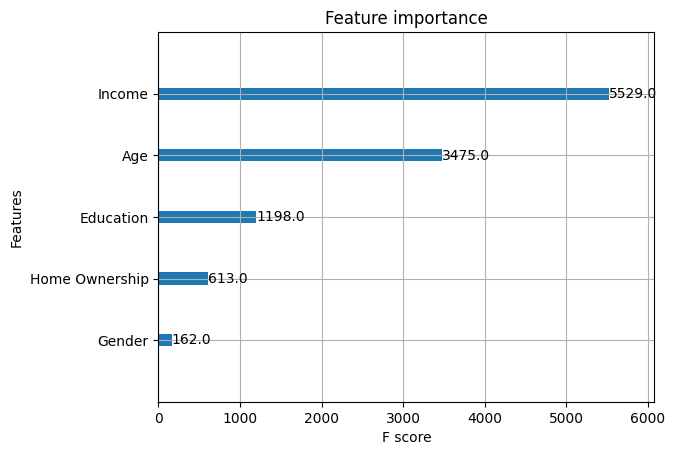

In [9]:
xgb.plot_importance(model)
plt.show()

Model evaluation

In [10]:
print(f"Best iteration: {model.best_iteration} - mlogloss: {model.best_score}")

Best iteration: 2305 - mlogloss: 0.02266166039573198


In [11]:
y_pred = model.predict(X_test)

print("Accuracy score: %.4f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy score: 100.0000%
